In [127]:
!curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/train.csv" -o "train.csv" 
!curl "http://www.codeheroku.com/static/workshop/datasets/malaria_detection/test.csv" -o "test.csv" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  181M  100  181M    0     0  80.7M      0  0:00:02  0:00:02 --:--:-- 80.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 45.5M  100 45.5M    0     0  51.9M      0 --:--:-- --:--:-- --:--:-- 51.9M


In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [130]:
train.head()


,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,...,pixel_2460,pixel_2461,pixel_2462,pixel_2463,pixel_2464,pixel_2465,pixel_2466,pixel_2467,pixel_2468,pixel_2469,pixel_2470,pixel_2471,pixel_2472,pixel_2473,pixel_2474,pixel_2475,pixel_2476,pixel_2477,pixel_2478,pixel_2479,pixel_2480,pixel_2481,pixel_2482,pixel_2483,pixel_2484,pixel_2485,pixel_2486,pixel_2487,pixel_2488,pixel_2489,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,187,0,0,0,0,0,0,0,0,...,0,0,61,187,186,188,188,186,187,187,188,187,187,186,187,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,49,90,48,...,45,167,187,188,188,187,188,188,131,31,0,38,33,0,35,52,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Parasitized,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,155,190,190,190,192,190,191,190,20,1,1,1,1,1,1,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,1,1,1,1,64,183,182,182,185,189,190,95,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,152,186,185,176,5,5,5,2,0,0,0,...,0,0,0,0,0,0,0,0,5,155,186,185,174,5,0,0,5,5,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Parasitized,0,0,0,0,0,0,0,0,0,0,0,0,10,188,187,185,184,185,183,181,181,180,180,180,180,180,179,179,179,180,178,179,133,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,63,187,188,188,188,64,0,0,148,190,139,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X_train  = train.drop(['label'],axis=1).values
y_train  = train['label'].values

X_test  = test.drop(['label'],axis=1).values
y_test  = test['label'].values

In [132]:
X_test.shape, y_test.shape

((5512, 2500), (5512,))

Parasitized


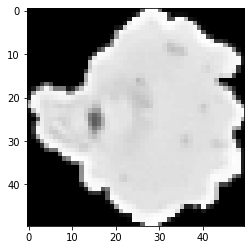

In [133]:
import matplotlib.pyplot as plt

index = 100

plt.imshow(X_train[index].reshape(50,50),cmap='gray')
print(y_train[index])

In [0]:
X_train = X_train.reshape(train.shape[0],50,50,1).astype('float32')
X_train = X_train / 255.0

X_test = X_test.reshape(test.shape[0],50,50,1).astype('float32')
X_test = X_test / 255.0

In [0]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [136]:
print("X_train shape", X_train.shape)
print("Y_train shape", y_train.shape)


X_train shape (22046, 50, 50, 1)
Y_train shape (22046, 2)


In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


In [138]:
model = Sequential()

model.add(Conv2D(filters=16,kernel_size=3,padding="same",activation="relu",input_shape=(50,50,1)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.2))
model.add(Flatten())

model.add(Dense(200,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 50, 50, 16)        160       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 6, 6, 64)        

In [0]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [0]:
# Generate dummy data
import numpy as np
data = np.random.random((1000, 100))
labels = np.random.randint(2, size=(1000, 1))

In [154]:
model.fit(X_train,y_train,batch_size=50,epochs=20,verbose=1)

Epoch 1/20
441/441 [==============================] - 5s 11ms/step - loss: 0.0481 - accuracy: 0.9830
Epoch 2/20
441/441 [==============================] - 5s 10ms/step - loss: 0.0435 - accuracy: 0.9841
Epoch 3/20
441/441 [==============================] - 5s 10ms/step - loss: 0.0404 - accuracy: 0.9847
Epoch 4/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0391 - accuracy: 0.9847
Epoch 5/20
441/441 [==============================] - 5s 10ms/step - loss: 0.0398 - accuracy: 0.9859
Epoch 6/20
441/441 [==============================] - 5s 10ms/step - loss: 0.0382 - accuracy: 0.9857
Epoch 7/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0315 - accuracy: 0.9892
Epoch 8/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0322 - accuracy: 0.9889
Epoch 9/20
441/441 [==============================] - 4s 10ms/step - loss: 0.0298 - accuracy: 0.9889
Epoch 10/20
441/441 [==============================] - 4s 9ms/step - loss: 0.0259 - accurac

In [155]:
predictions = model.evaluate(X_test,y_test)

173/173 [==============================] - 1s 5ms/step - loss: 0.3553 - accuracy: 0.9503


Actual [1. 0.]


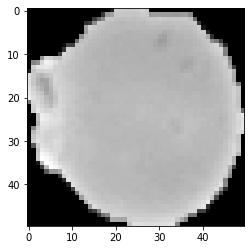

In [163]:
index = 1000
import numpy as np
plt.imshow(X_test[index].reshape(50,50),cmap='gray')
print("Actual",y_test[index])